# Assignment 8 - Pandas

Due Wednesday July 29

Your assignment should be handed in as an iPython/Jupyter notebook checked into your private GitHub repository CMSC6950_Assignments in a new folder named assignment_8. 

In this assignment we will use pandas to examine earthquake data.

Start by importing pandas, numpy and matplotlib.

In [104]:
import pandas as pd
import numpy as np
import matplotlib as plt

A dataset has be retrieved .csv format from the [USGS Earthquakes Database](https://earthquake.usgs.gov/earthquakes/search/). It is located at:

http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv

You don't even need to download it. You can open it directly with Pandas.

### 1) Use Pandas' read_csv function directly on this url to open it as a DataFrame
(Don't use any special options). Display the first few rows and the DataFrame info.

In [2]:
eq_df = pd.read_csv("http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv")

You should have seen that the dates were not automatically parsed into datetime types.

### 2) Re-read the data in such a way that all date columns are identified as dates and the earthquake id is used as the index

Verify that this worked using the `head` and `info` functions.


In [3]:
eq_df=pd.read_csv("http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv",parse_dates=[0],index_col=[11])

In [4]:
eq_df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


In [5]:
eq_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120108 entries, ak11155107 to ak11453389
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   time       120108 non-null  datetime64[ns]
 1   latitude   120108 non-null  float64       
 2   longitude  120108 non-null  float64       
 3   depth      120107 non-null  float64       
 4   mag        120065 non-null  float64       
 5   magType    120065 non-null  object        
 6   nst        59688 non-null   float64       
 7   gap        94935 non-null   float64       
 8   dmin       85682 non-null   float64       
 9   rms        119716 non-null  float64       
 10  net        120108 non-null  object        
 11  updated    120108 non-null  object        
 12  place      120108 non-null  object        
 13  type       120108 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(5)
memory usage: 13.7+ MB


### 3) Use `describe` to get the basic statistics of all the columns

Note the highest and lowest magnitude of earthquakes in the databse.

In [37]:
eq_df.describe()


,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,120108.000000,120108.000000,120107.000000,120065.000000,59688.000000,94935.000000,85682.000000,119716.000000
mean,38.399579,-99.961402,28.375029,1.793958,17.878284,124.048978,0.893198,0.358174
std,21.938258,82.996858,62.215416,1.343466,14.911369,68.518595,2.903966,0.364046
min,-73.462000,-179.998900,-9.900000,-0.970000,0.000000,9.000000,0.000000,0.000000
25%,34.228917,-147.742025,4.100000,0.820000,8.000000,74.000000,0.020760,0.070000
50%,38.805300,-120.832000,9.200000,1.400000,14.000000,107.000000,0.073670,0.200000
75%,53.889500,-116.068100,22.880000,2.400000,22.000000,155.000000,0.447000,0.590000
max,86.651400,179.998000,697.360000,8.200000,365.000000,356.400000,64.498000,8.460000


In [38]:
eq_df.mag.min(),eq_df.mag.max()

(-0.97, 8.2)

### 4) Use `sort_values` to get the top 20 earthquakes by magnitude

In [47]:
eqsort= eq_df.sort_values(by='mag', ascending =False).head(20)
eqsort

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
usc000nzvd,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.609,0.66,us,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake
usc000rki5,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.133,0.71,us,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake
usc000p27i,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.029,0.82,us,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake
usc000phx5,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.828,0.71,us,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake
usb000pr89,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.820,1.25,us,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake
usc000piqj,2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.885,1.00,us,2015-08-13T19:29:13.018Z,"112km S of Kirakira, Solomon Islands",earthquake
usb000slwn,2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.078,0.70,us,2015-08-13T19:35:02.679Z,"74km S of Intipuca, El Salvador",earthquake
usb000pq41,2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.250,1.20,us,2015-08-13T19:30:39.599Z,"33km ESE of Petatlan, Mexico",earthquake
usc000pft9,2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.729,0.88,us,2014-07-01T02:37:56.000Z,"56km WSW of Panguna, Papua New Guinea",earthquake


Examine the structure of the `place` column. The country information seems to be in there. How would you get it out?

### 5) Extract the country using Pandas [text data functions](https://pandas.pydata.org/pandas-docs/stable/text.html)

Add it as a new column to the dataframe. (Is it really just country? No, some rows have the name of a US state.)

In [45]:
country = eq_df.place.str.split(pat=',').str[1]
country = country.fillna(eq_df.place.str.split(pat=',').str[0])
country

id
ak11155107         Alaska
nn00436847         Nevada
ak11151142         Alaska
ak11151135         Alaska
ci37171541         Mexico
                 ...     
ak11453391         Alaska
ak11453395         Alaska
nc72358451     California
ak11453390         Alaska
ak11453389         Alaska
Name: place, Length: 120108, dtype: object

In [50]:
new= pd.concat([eq_df,country],axis=1)
new = new.rename(columns={ new.columns[14]: "Country" })
new

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,Country,type,Country
id,,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,Alaska
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,Nevada
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake,Alaska
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake,Alaska
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ak11453391,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake,Alaska
ak11453395,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake,Alaska
nc72358451,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake,California


pandas.core.series.Series

### 6) Find the 10 states / countries with the highest _number_ of earthquakes

In [119]:
count= country.groupby(country).count()
count= count.sort_values(ascending=False).head(10)
count

place
 California     44451
 Alaska         33589
 Oregon          3195
 Nevada          2858
 Washington      2784
 Hawaii          2564
 Puerto Rico     2284
 Indonesia       2120
 Oklahoma        1992
 Montana         1991
Name: place, dtype: int64

### 7) Find the top 10 states / countries where the strongest and weakest earthquakes occured

In [17]:
eq_df.sort_values(by='mag', ascending =False).head(10)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
usc000nzvd,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.609,0.66,us,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake
usc000rki5,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.133,0.71,us,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake
usc000p27i,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.029,0.82,us,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake
usc000phx5,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.828,0.71,us,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake
usb000pr89,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.820,1.25,us,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake
usc000piqj,2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.885,1.00,us,2015-08-13T19:29:13.018Z,"112km S of Kirakira, Solomon Islands",earthquake
usb000slwn,2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.078,0.70,us,2015-08-13T19:35:02.679Z,"74km S of Intipuca, El Salvador",earthquake
usb000pq41,2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.250,1.20,us,2015-08-13T19:30:39.599Z,"33km ESE of Petatlan, Mexico",earthquake
usc000pft9,2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.729,0.88,us,2014-07-01T02:37:56.000Z,"56km WSW of Panguna, Papua New Guinea",earthquake


In [18]:
eq_df.sort_values(by='mag', ascending =False).tail(10)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
nn00445675,2014-05-04 01:39:31.756,36.9943,-116.0194,7.2997,NaN,NaN,6.0,111.790000,0.063,0.0607,nn,2014-05-06T21:52:47.000Z,"66km E of Beatty, Nevada",earthquake
usc000rmt8,2014-06-16 19:25:35.710,41.0986,-112.8122,0.0000,NaN,NaN,NaN,57.000000,0.242,1.6800,us,2014-09-12T15:47:07.000Z,Utah,mining explosion
usc000re57,2014-06-11 19:05:19.740,43.6365,-105.2006,0.0000,NaN,NaN,NaN,52.000000,0.971,0.6600,us,2014-09-12T15:47:07.000Z,Wyoming,mining explosion
usc000rd9g,2014-06-10 13:14:46.540,43.2236,-126.7592,10.0000,NaN,NaN,NaN,240.000000,2.711,0.5600,us,2014-08-30T17:02:57.000Z,"191km W of Bandon, Oregon",earthquake
usc000rn1v,2014-06-09 19:39:29.680,41.0993,-112.8059,0.0000,NaN,NaN,NaN,57.000000,0.246,1.2100,us,2014-08-30T17:03:01.000Z,Utah,mining explosion
usc000rc7u,2014-06-06 17:59:44.850,43.8161,-105.2084,0.0000,NaN,NaN,NaN,26.000000,0.899,0.5700,us,2014-08-30T17:03:01.000Z,Wyoming,mining explosion
usc000rbx5,2014-06-06 02:51:47.180,35.4941,-97.2356,5.0000,NaN,NaN,NaN,52.000000,0.080,0.6800,us,2014-08-30T17:02:58.000Z,"3km E of Choctaw, Oklahoma",earthquake
us2014_001,2014-07-18 07:10:00.000,33.5000,-117.7000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,us,2015-01-28T19:08:08.600Z,"Greater Los Angeles area, California",sonicboom
usb000rryt,2014-07-10 23:27:13.200,40.4963,-104.4916,5.0000,NaN,NaN,NaN,170.000000,1.087,1.4600,us,2014-10-10T08:02:11.000Z,"13km NNE of Kersey, Colorado",earthquake


In [89]:
Top= new[['mag','Country']]
valid_mag.sort_values('mag',ascending=False).head(10)

,mag,Country,Country
id,,,
usc000nzvd,8.2,"94km NW of Iquique, Chile",Chile
usc000rki5,7.9,"19km SE of Little Sitkin Island, Alaska",Alaska
usc000p27i,7.7,"53km SW of Iquique, Chile",Chile
usc000phx5,7.6,"93km SSE of Kirakira, Solomon Islands",Solomon Islands
usb000pr89,7.5,"70km SW of Panguna, Papua New Guinea",Papua New Guinea
usc000piqj,7.4,"112km S of Kirakira, Solomon Islands",Solomon Islands
usb000slwn,7.3,"74km S of Intipuca, El Salvador",El Salvador
usb000pq41,7.2,"33km ESE of Petatlan, Mexico",Mexico
usc000pft9,7.1,"56km WSW of Panguna, Papua New Guinea",Papua New Guinea


In [92]:
#valid_mag.sort_values('mag',ascending=True).head(10)
new.sort_values('mag',ascending=False).head(10)['Country'],new.sort_values('mag',ascending=False).head(10)['mag']

(                                            Country            Country
 id                                                                    
 usc000nzvd                94km NW of Iquique, Chile              Chile
 usc000rki5  19km SE of Little Sitkin Island, Alaska             Alaska
 usc000p27i                53km SW of Iquique, Chile              Chile
 usc000phx5    93km SSE of Kirakira, Solomon Islands    Solomon Islands
 usb000pr89     70km SW of Panguna, Papua New Guinea   Papua New Guinea
 usc000piqj     112km S of Kirakira, Solomon Islands    Solomon Islands
 usb000slwn          74km S of Intipuca, El Salvador        El Salvador
 usb000pq41             33km ESE of Petatlan, Mexico             Mexico
 usc000pft9    56km WSW of Panguna, Papua New Guinea   Papua New Guinea
 usc000sxh8      154km NW of Kota Ternate, Indonesia          Indonesia,
 id
 usc000nzvd    8.2
 usc000rki5    7.9
 usc000p27i    7.7
 usc000phx5    7.6
 usb000pr89    7.5
 usc000piqj    7.4
 usb000slwn    7.

It looks like US states are being treated differently from foreign countries. We would like to fix that.

How can we tell if a name is a US state name? Python has a package for that: https://pypi.python.org/pypi/us!

This is a good time to try installing a new package using `pip`. Pip is the original python package manager that predates `conda`. Basically `conda` is more oriented towards data science while `pip` is more general purpose. There are lots more packages on `pip` than on `conda`. You can read a [comparision](https://www.quora.com/What-is-the-comparison-among-conda-vs-pip-vs-anaconda) of these two utilities if you want to know more.

### 8) Install the `us` package using pip, either directly from the notebook or the command line

The shell command is `pip install us`.

In [82]:
pip install us

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 132 kB 737 kB/s eta 0:00:01
  Created wheel for us: filename=us-2.0.2-py3-none-any.whl size=11927 sha256=d0a4ee56eaf4172ade480bb1749dfdaf1b989521cceed9aaf57f21ce32c73f74
  Stored in directory: /home/dant/.cache/pip/wheels/07/4c/fa/a65ed0f9c00360e785327fc370eba55ca575cc3508ab13ed8e
  Created wheel for jellyfish: filename=jellyfish-0.6.1-cp38-cp38-linux_x86_64.whl size=80566 sha256=3c27cb163660432ad670be1f104dca68044ea5c639dec1ed9a0b0f432e3f3a2a
  Stored in directory: /home/dant/.cache/pip/wheels/aa/a9/a6/359d736dbeda356e6ab8a7ff70a3db636cefe91df7d09f63dc
Successfully built us jellyfish
Note: you may need to restart the kernel to use updated packages.


### 9) Import the `us` package to verify your installation works

In [61]:
import us 

### 10) Read the [`us` documentation](https://pypi.python.org/pypi/us) to figure out how to create a list of state names (all upper case)

In [76]:
State= us.states.STATES
State= str([state.name for state in State]).upper()
State

"['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO', 'CONNECTICUT', 'DELAWARE', 'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA', 'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON', 'WEST VIRGINIA', 'WISCONSIN', 'WYOMING']"

### 11) Write a function to check whether a string is a US state name.
This function should not be case sensitive. It should also strip any whitespace out of the test string.

In [117]:
def Check(string):
    if string() in State:
        return True
    else:
        return False

In [113]:
def CHECK(name):
    if name.upper() in State:
        return True
    else:
        return False

### 12) Use Pandas' [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html) function to apply this to each row of the country name series

You should produce a new boolean series. (Hint: use `dropna()` to drop rows that have null values before calling apply.)

In [118]:
isState =new['Country'].dropna().apply(Check)

TypeError: 'Series' object is not callable

In [107]:
df = new.dropna(axis=0,subset=['Country'])
df = df['Country'].apply(Check)

AttributeError: 'Series' object has no attribute 'strip'

### 13) reindex this boolean series to match the dataframe's index
Fill the null values with `False` using `.fillna()`.

In [11]:
country2=country.fillna(False)
country2

id
ak11155107         Alaska
nn00436847         Nevada
ak11151142         Alaska
ak11151135         Alaska
ci37171541         Mexico
                 ...     
ak11453391         Alaska
ak11453395         Alaska
nc72358451     California
ak11453390         Alaska
ak11453389         Alaska
Name: place, Length: 120108, dtype: object

### 14) Now re-assign the country column in the DataFrame to `USA` if the row is a state.
Also add the state name as a new column.

### 15) Now redo the country count and minimum magnitdue using the corrected data

In [95]:
count= country.groupby(country).count()
count.sort_values(ascending=False).head(10)

place
 California     44451
 Alaska         33589
 Oregon          3195
 Nevada          2858
 Washington      2784
 Hawaii          2564
 Puerto Rico     2284
 Indonesia       2120
 Oklahoma        1992
 Montana         1991
Name: place, dtype: int64

In [96]:
count= country.groupby(country).count()
count.sort_values(ascending=True).head(10)

place
western Xizang                      1
 Ukraine                            1
 Vermont                            1
 West Virginia                      1
1km ENE of Quarry at VICTORVILLE    1
1km NNE of Quarry at BORON          1
3km WSW of Quarry at CUSHENBURY     1
Alabama                             1
 Germany                            1
 Hungary                            1
Name: place, dtype: int64

### 16) Create a filtered dataset that only has earthquakes of magnitude 4 or larger

In [121]:
Q=new.query('mag>4')
Q

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,Country,type,Country
id,,,,,,,,,,,,,,,
usc000mqlp,2014-01-31 23:08:03.660,-4.9758,153.9466,110.18,4.2,mb,NaN,98.0,1.940,0.61,us,2014-04-08T01:43:19.000Z,"115km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea
usc000mqln,2014-01-31 22:54:32.970,-28.1775,-177.9058,95.84,4.3,mb,NaN,104.0,1.063,1.14,us,2014-04-08T01:43:19.000Z,"120km N of Raoul Island, New Zealand",earthquake,New Zealand
usc000mqls,2014-01-31 22:49:49.740,-23.1192,179.1174,528.34,4.4,mb,NaN,80.0,5.439,0.95,us,2014-04-08T01:43:19.000Z,South of the Fiji Islands,earthquake,South of the Fiji Islands
usc000mf1x,2014-01-31 22:19:44.330,51.1569,-178.0910,37.50,4.2,mb,NaN,NaN,NaN,0.83,us,2014-04-08T01:43:19.000Z,"72km E of Amatignak Island, Alaska",earthquake,Alaska
usc000mqlm,2014-01-31 21:56:44.320,-4.8800,153.8434,112.66,4.3,mb,NaN,199.0,1.808,0.79,us,2014-04-08T01:43:19.000Z,"100km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usc000t6yh,2014-12-01 02:56:07.950,21.2031,143.5484,11.05,4.4,mb,NaN,107.0,5.996,0.87,us,2015-02-24T00:35:14.040Z,"158km WNW of Farallon de Pajaros, Northern Mar...",earthquake,Northern Mariana Islands
usc000t6y2,2014-12-01 01:50:23.380,-7.8798,106.4275,52.10,4.3,mb,NaN,119.0,1.412,1.50,us,2015-02-24T00:35:14.040Z,"57km SSW of Cibungur, Indonesia",earthquake,Indonesia
usc000t6y1,2014-12-01 01:04:17.890,7.1429,126.8844,176.67,4.3,mb,NaN,134.0,1.297,0.87,us,2015-02-24T00:35:14.040Z,"37km ESE of Santiago, Philippines",earthquake,Philippines


### 17) Analyze the distribution of the Earthquake magnitudes in the filtered distribution

Make a histogram of the Earthquake count versus magnitude. Make sure to use a Logarithmic scale. What sort of relationship do you see?

In [160]:
LOG = Q['mag']
LOG=LOG.groupby(LOG).count()
LOG= LOG.sort_values(ascending=False).head(20)
LOG

mag
4.4    2201
4.3    2150
4.5    2079
4.2    1985
4.6    1849
4.1    1700
4.7    1288
4.8     837
4.9     523
5.0     381
5.1     321
5.2     230
5.3     185
5.4     132
5.6      94
5.5      90
5.7      56
5.8      54
6.0      31
5.9      31
Name: mag, dtype: int64

(array([50.,  3.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  4.]),
 array([1.000e+00, 2.210e+02, 4.410e+02, 6.610e+02, 8.810e+02, 1.101e+03,
        1.321e+03, 1.541e+03, 1.761e+03, 1.981e+03, 2.201e+03]),
 <a list of 10 Patch objects>)

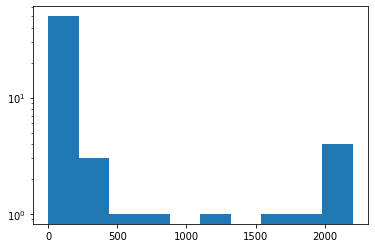

In [159]:
plt.pyplot.hist(LOG,bins=10,log=True)

### 18) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude.

Use the filtered data. Color it by magnitude. Make it pretty

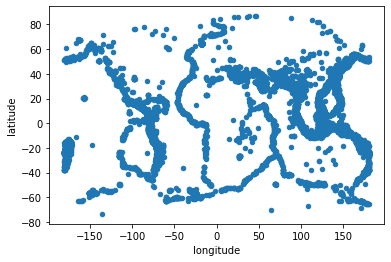

In [163]:
Q.plot(kind="scatter",x='longitude',y='latitude')

### 19) Do the same for depth

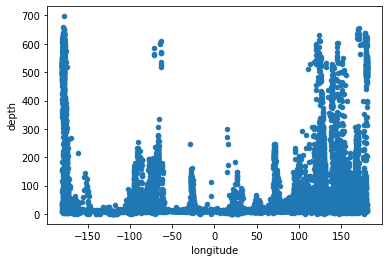

In [176]:
Q.plot(kind="scatter",x='longitude',y='depth')